In [41]:
from pylab import *
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

(100, 115, 115)


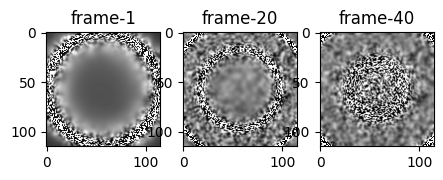

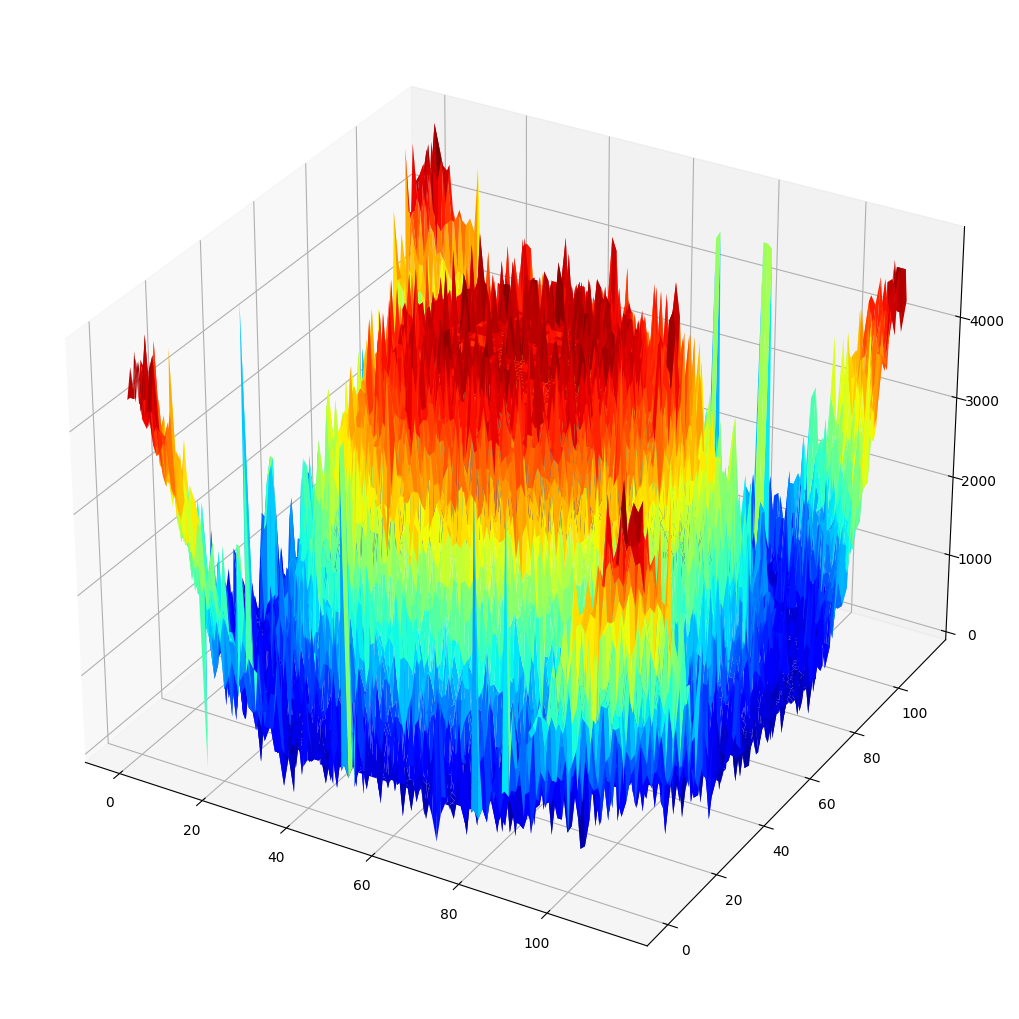

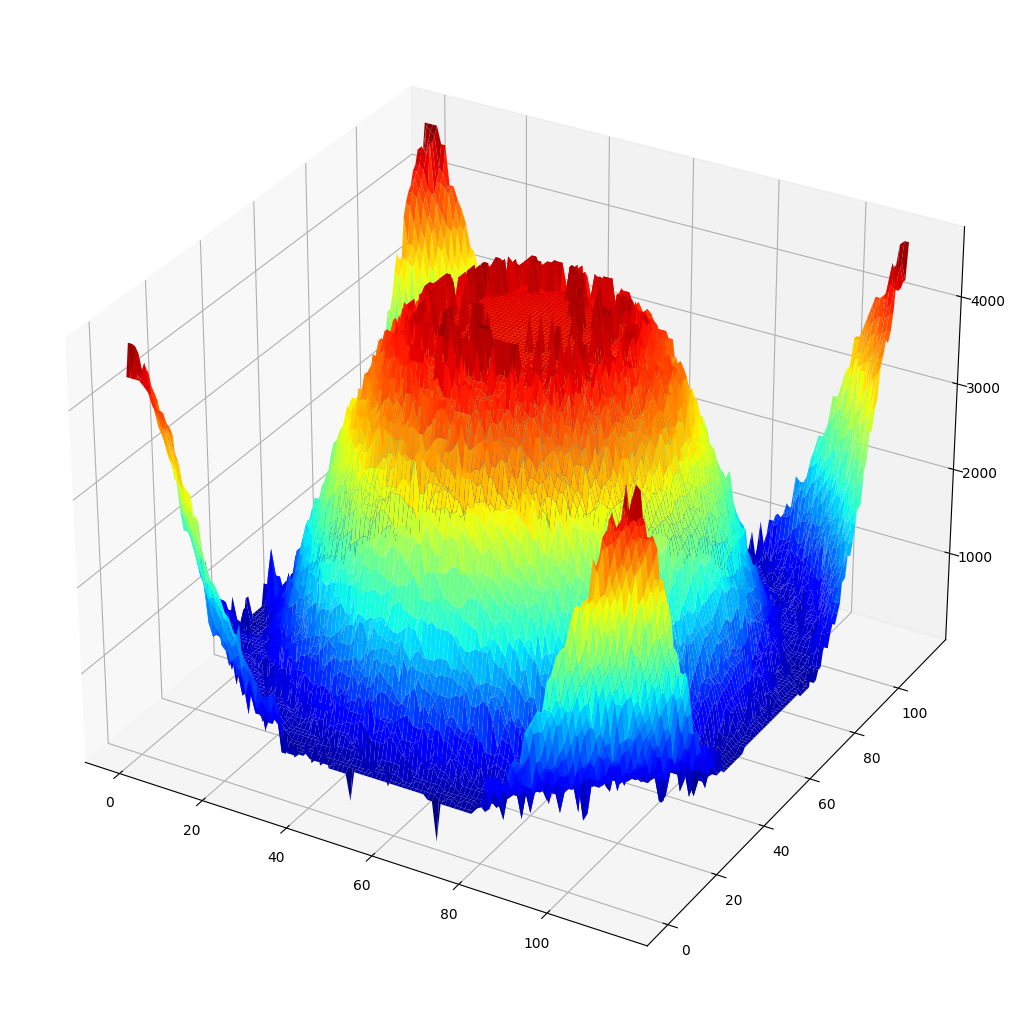

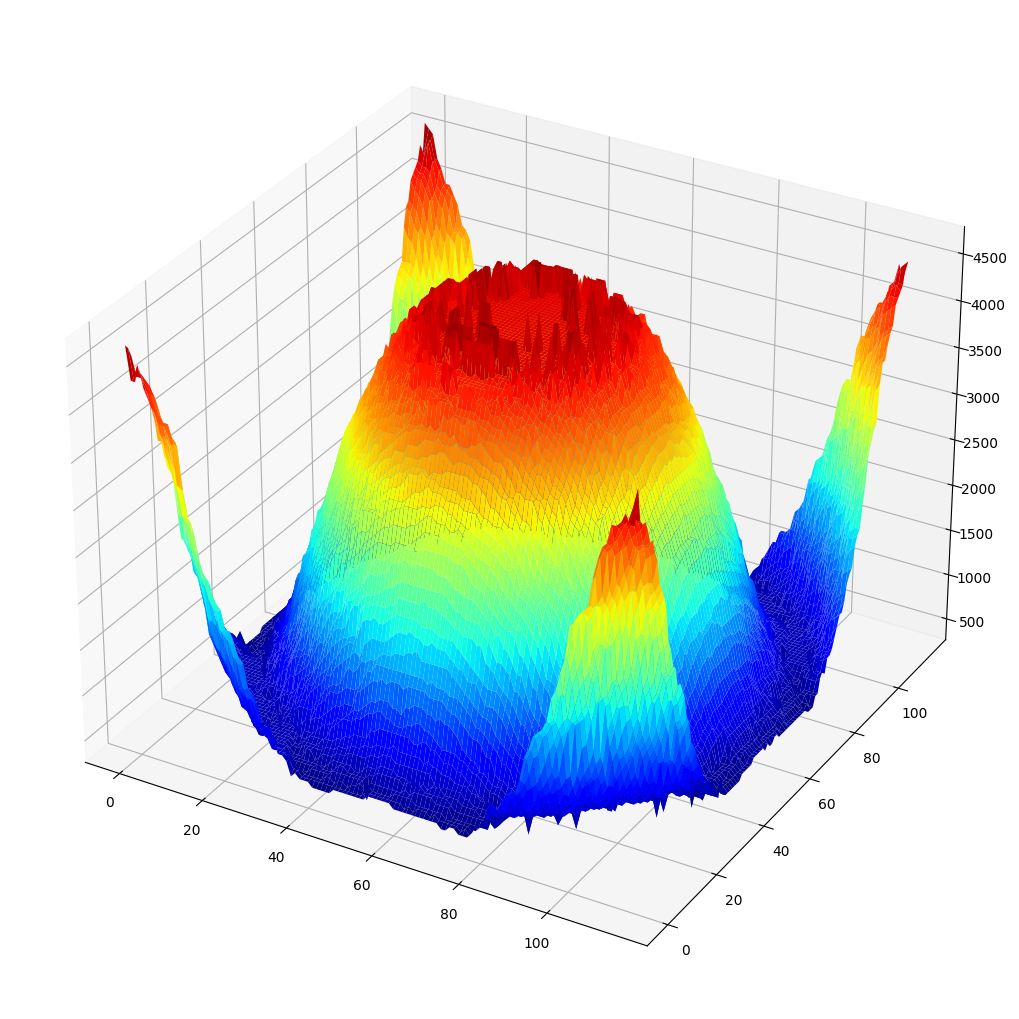

In [42]:
def sml(src,q,delta_d = 50.50) :
    fxx = np.array([[0,0,0],[1,-2,1],[0,0,0]])
    fyy = np.array([[0,1,0],[0,-2,0],[0,1,0]])
    d = len(fxx)//2
    Nimg,Nr,Nc = shape(src)
    zero_padd_img = np.zeros((Nimg,int(Nr+2*d),int(Nc+2*d)))
    ml = np.zeros(shape(src))
    zero_padd_img[:,d:Nr+d,d:Nc+d] = np.copy(src)
    patch = np.zeros(shape(fxx))
    for i in range(d,Nr+d)  :
        for j in range(d,Nc+d) :
            patch = zero_padd_img[:,i-d:i+d+1,j-d:j+d+1]
            patch1 = np.sum(patch*fxx,axis = (1,2))
            patch2 = np.sum(patch*fyy,axis = (1,2))
            patch = abs(patch1) + abs(patch2)
            ml[:,i-d,j-d] = patch
    if q != 0 :
        avg_filter = np.ones((int(2*q+1),int(2*q+1)))/(2*q+1)
        d = len(avg_filter)//2
        Nimg,Nr,Nc = shape(ml)
        zero_padd_img = np.zeros((Nimg,int(Nr+2*d),int(Nc+2*d)))
        sml = np.zeros(shape(ml))
        zero_padd_img[:,d:Nr+d,d:Nc+d] = ml
        patch = np.zeros(shape(avg_filter))
        for i in range(d,Nr+d) :
            for j in range(d,Nc+d) :
                patch = zero_padd_img[:,i-d:i+d+1,j-d:j+d+1]
                patch1 = sum(patch*avg_filter,axis = (1,2))
                sml[:,i-d,j-d] = patch1
    else :
        sml = ml
    depth = np.argmax(sml,axis = 0)
    depth = depth*delta_d
    return depth

pics = loadmat("stack.mat")
frames = []
for i in range(1,10) :
    img = pics["frame00%1d"%i]
    frames.append(img)
for i in range(10,100) :
    img = pics["frame0%2d"%i]
    frames.append(img)
img = pics["frame100"]
frames.append(img)
frames = array(frames)
print(shape(frames))
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5, 5))
ax1.imshow(frames[5,:,:], cmap=plt.cm.gray, vmin=0, vmax=255)
ax1.set_title('frame-1')
ax2.imshow(frames[50,:,:], cmap=plt.cm.gray, vmin=0, vmax=255)
ax2.set_title('frame-20')
ax3.imshow(frames[80,:,:], cmap=plt.cm.gray, vmin=0, vmax=255)
ax3.set_title('frame-40')
plt.show()
depth0 = sml(src = frames,q = 0)
X = np.arange(len(depth0))
Y = np.arange(len(depth0[0]))
X,Y = meshgrid(X,Y)
fig = plt.figure(figsize=(10,15))
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(X, Y, depth0, rstride=1, cstride=1, cmap=cm.jet, linewidth=1, antialiased=True)
plt.show()
depth1 = sml(src = frames,q = 1)
X = np.arange(len(depth1))
Y = np.arange(len(depth1[0]))
X,Y = meshgrid(X,Y)
fig = plt.figure(figsize=(10,15))
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(X, Y, depth1, rstride=1, cstride=1, cmap=cm.jet, linewidth=1, antialiased=True)
plt.show()
depth2 = sml(src = frames,q = 2)
X = np.arange(len(depth2))
Y = np.arange(len(depth2[0]))
X,Y = meshgrid(X,Y)
fig = plt.figure(figsize=(10,15))
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(X, Y, depth2, rstride=1, cstride=1, cmap=cm.jet, linewidth=1, antialiased=True)
plt.show()